<a href="https://colab.research.google.com/github/StephanieO-py/Road-Carnages/blob/main/Uber_Nairobi_Ambulance_Perambulation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT

The lack of immediate responses from medical teams in cases of post-crash emergencies is seemingly increasing the rate of morbidity from road carnages in Nairobi, robbing us of our children and youth who are the pillars of our future.

Seeing as every second counts, the task is to optmize the response time of ambulances by strategically positioning the responders while putting into consideration the layout of the city and the heavy traffic patterns especially during peak hours.

The data that is being mainly being put to use is crashes that occured between 2018 to June 2019, supplimented by data from Uber Movement, road survey data and weather patterns to identify patterns of risk across the city.

The goal is to be able to use what I've been able to usde my findings to strategically and virtually place 6 emergency responders in the city and moving them throughout the day and ultimately minimising the distance travelled when responding to crashes during the test period.

### Reading the data

In [ ]:
# importing the necessary libraries

import pandas as pd # allows us to read our files and organize them in tabular form
import numpy as np # numpy allows us to work with multi dimensional arrays
import matplotlib.pyplot as plt# matplotlib - a 2D library used to plot numpy computations
plt.style.use('ggplot')
import scipy
# scipy-a python ecosystem used for mathematics, machine learning 
import seaborn as sns
# seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
%matplotlib inline
# for visualization 
import sklearn
# sklearn-used for machine learning, 
import statsmodels.api as sm
# statsmodel-used to run regression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# loading the dataset
traindf = pd.read_csv('/Train.csv')
print(traindf.shape)
traindf

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518


As seen above, the train dataset contains 6,318 rows and 4 columns i.e.
* uid- unique id
* datetime - the data and time that an accident occured
* latitude and longitude - the location of the accident 

### Cleaning the training data 

In [ ]:
# check for duplicates

traindf.duplicated().sum()

0

In [ ]:
# check for null values

traindf.isnull().sum()

uid          0
datetime     0
latitude     0
longitude    0
dtype: int64

The train dataset is seen to be clean, as it has no duplicates or null values

In [ ]:
!pip install folium
!pip install geojson
!pip install jsonschema
!pip install leaflet

import leaflet
import folium
import json
import jsonschema
from jsonschema import validate

geodata = json.load(open("/segments_geometry.geojson"))
geodata['features'][0]['geometry']

{'coordinates': [[36.8260292, -1.2844709],
  [36.82604954936898, -1.284444101379869],
  [36.82607659422822, -1.284408485292231],
  [36.82610363908745, -1.284372869204592],
  [36.82613068394668, -1.284337253116954],
  [36.82615772880592, -1.284301637029317],
  [36.82618477366515, -1.284266020941681],
  [36.826211818524385, -1.284230404854043],
  [36.826238863383615, -1.284194788766405],
  [36.82626590824285, -1.284159172678767],
  [36.82629295310208, -1.284123556591129],
  [36.826319262976725, -1.284087419110355],
  [36.82634394088594, -1.284050123924252],
  [36.82636861879516, -1.28401282873815],
  [36.82639329670437, -1.283975533552048],
  [36.826417974613584, -1.283938238365946],
  [36.82644161135365, -1.283900297970969],
  [36.82646402598816, -1.283861600241459],
  [36.82648644062267, -1.283822902511947],
  [36.82650885525718, -1.283784204782435],
  [36.826531269891696, -1.283745507052925],
  [36.826555607177916, -1.283708049463544]],
 'type': 'LineString'}

In [ ]:
import geopandas as gpd

geodata = gpd.read_file('/segments_geometry.geojson')
geodata.take(np.random.permutation(len(geodata))[:20])

,segment_id,road_name,geometry
330,155_11,muranga road-primary,"LINESTRING (36.82194 -1.27707, 36.82190 -1.277..."
651,195_2,kiambu road-secondary,"LINESTRING (36.84392 -1.23739, 36.84393 -1.237..."
403,24_2,outer ring road-primary,"LINESTRING (36.88396 -1.28575, 36.88395 -1.285..."
393,56_3,outer ring road-primary,"LINESTRING (36.88791 -1.30311, 36.88789 -1.303..."
693,318_1,ngong road 3-secondary,"LINESTRING (36.74787 -1.30401, 36.74783 -1.304..."
430,139_7,prof. wangari maathai road-trunk,"LINESTRING (36.82139 -1.26873, 36.82134 -1.268..."
108,22_2,jogoo road-secondary,"LINESTRING (36.85965 -1.29603, 36.85970 -1.296..."
59,121_1,elgeyo marakwet road-tertiary,"LINESTRING (36.77937 -1.29842, 36.77937 -1.298..."
640,295_3,juja road-secondary,"LINESTRING (36.84360 -1.26742, 36.84356 -1.267..."
599,80_3,waiyaki way-trunk,"LINESTRING (36.80180 -1.26423, 36.80184 -1.264..."


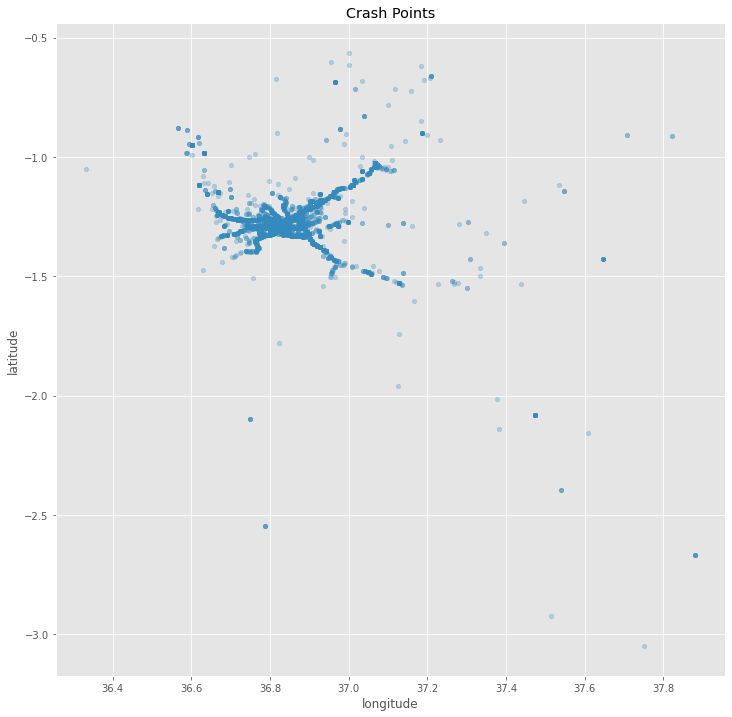

In [ ]:
# display crash points/accident prone areas on graph
traindf.plot(x='longitude', y='latitude', kind='scatter', figsize=(12, 12), alpha=0.3, title='Crash Points')

In [ ]:
# plot the map of nairobi to get a detailed view of the city
nrb=folium.Map(location=[-1.286389,36.817223], zoom_start=15)
nrb

In [ ]:
# create a basemap that will be used as the base of the heatmap
def generateBaseMap(default_location=[-1.286389,36.817223], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap()


In [ ]:
# apply the heat map to the base map from above, showing the accident prone areas and save 'nrb1' as an image
from folium import plugins
import folium.plugins as plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
nrb1 = HeatMap(data=traindf[['latitude', 'longitude']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)

nrb1.save("Heatmap.png")

# display heatmap
base_map

* The heat map above gives us a better view of where the accidents are highly concentrated, with the color variation. 
* At the heart of the city we can see the color intensity is  very high, then there's a radial transition im the color gradient as we move further away from the center.
* Because of the noted observation, more ambulances will be centered at the brighly colored regions of the map 
* **NOTE** : When you zoom in further the roads are much more detailed, therefore you can see the exact locations where road carnage is high

## Feature Engineering 

Because we want to see how the weather contributes to road accidents we will have to perform some feature engineering by join 2 data frames together and dropping some columns then proceed to perform an evaluation with the help of a correlation matrix.

* **Positive Correlation**: both variables change in the same direction.
* **Neutral Correlation**: No relationship in the change of the variables.
* **Negative Correlation**: variables change in opposite directions.

In [ ]:
# Because both the weather and the train datasets both have date in common, we will join the 2 using that column 
# However, in the train data set, the date is combined with the time, we therefore have to split them into 2 

traindf.datetime = traindf.datetime.apply(pd.to_datetime)
traindf['Date'] = [d.date() for d in traindf['datetime']]
traindf['Time'] = [d.time() for d in traindf['datetime']]
traindf.take(np.random.permutation(len(traindf))[:10])

,uid,datetime,latitude,longitude,Date,Time
382,383,2018-01-26 13:07:00,-1.325003,36.847435,2018-01-26,13:07:00
3699,3700,2018-10-22 05:38:39,-1.321228,36.808475,2018-10-22,05:38:39
1480,1481,2018-04-25 06:01:58,-1.185936,36.906669,2018-04-25,06:01:58
1303,1304,2018-04-11 19:18:29,-1.264331,36.746984,2018-04-11,19:18:29
458,459,2018-02-03 02:57:02,-1.379342,36.927911,2018-02-03,02:57:02
5764,5765,2019-05-01 23:18:07,-1.215966,36.901110,2019-05-01,23:18:07
6308,6309,2019-06-29 12:15:44,-1.325402,36.848130,2019-06-29,12:15:44
807,808,2018-03-04 11:25:26,-2.394819,37.539339,2018-03-04,11:25:26
1452,1453,2018-04-23 17:46:28,-1.298358,36.886401,2018-04-23,17:46:28
2643,2644,2018-07-21 09:15:24,-1.195786,36.838267,2018-07-21,09:15:24


In [ ]:
# Proceed to drop columns that are irrelevant 

traindf.drop(['uid','datetime'],axis=1,inplace=True)
print(traindf.shape)

(6318, 4)


In [ ]:
# Load the weather dataset

weatherdf = pd.read_csv('/Weather_Nairobi_Daily_GFS.csv')
print(weatherdf.shape)
weatherdf


(731, 7)


,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742
...,...,...,...,...,...,...,...
726,2019-12-28,31.020416,87.099998,0.012772,16.854364,-0.930054,-1.511265
727,2019-12-29,28.900000,88.900002,0.012430,16.086237,-0.884575,-0.639897
728,2019-12-30,21.600000,89.300003,0.012130,15.670770,-2.423813,-1.155928
729,2019-12-31,16.500000,85.000000,0.010974,14.947778,-1.415813,-2.028264


* As observed above the Weather dataset has 7 columns containing 731 entries, which is more than the train dataset which has 4 columns containing 6318 entries 

In [ ]:
# Checking the weather dataset for duplicated values

weatherdf.duplicated().sum()

0

In [ ]:
# checking for null values

weatherdf.isnull().sum()

Date                                    0
precipitable_water_entire_atmosphere    3
relative_humidity_2m_above_ground       3
specific_humidity_2m_above_ground       3
temperature_2m_above_ground             3
u_component_of_wind_10m_above_ground    3
v_component_of_wind_10m_above_ground    3
dtype: int64

* As seen above, every column has 3 null values except the date column.

In [ ]:
# Drop the null values

weatherdf.dropna(inplace=True)
weatherdf.isnull().any()

Date                                    False
precipitable_water_entire_atmosphere    False
relative_humidity_2m_above_ground       False
specific_humidity_2m_above_ground       False
temperature_2m_above_ground             False
u_component_of_wind_10m_above_ground    False
v_component_of_wind_10m_above_ground    False
dtype: bool

In [ ]:
print(weatherdf.shape)

(728, 7)


* The weather dataset is now left with 728 entries

In [ ]:
# Join the two dataframes

df = pd.concat([traindf, weatherdf], axis=1).corr()

# Evaluate the correlation of the variables 

corrMatrix = df.corr()
corrMatrix

,latitude,longitude,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
latitude,1.000000,-0.497712,-0.287146,-0.205018,-0.234000,-0.059604,0.005970,-0.142551
longitude,-0.497712,1.000000,-0.374080,-0.302573,-0.402842,-0.213684,-0.042519,-0.149945
precipitable_water_entire_atmosphere,-0.287146,-0.374080,1.000000,0.637903,0.775517,0.290771,-0.126051,0.145257
relative_humidity_2m_above_ground,-0.205018,-0.302573,0.637903,1.000000,0.818979,-0.218131,-0.206526,0.323290
specific_humidity_2m_above_ground,-0.234000,-0.402842,0.775517,0.818979,1.000000,0.381258,-0.555867,-0.124810
temperature_2m_above_ground,-0.059604,-0.213684,0.290771,-0.218131,0.381258,1.000000,-0.606627,-0.727666
u_component_of_wind_10m_above_ground,0.005970,-0.042519,-0.126051,-0.206526,-0.555867,-0.606627,1.000000,0.670612
v_component_of_wind_10m_above_ground,-0.142551,-0.149945,0.145257,0.323290,-0.124810,-0.727666,0.670612,1.000000


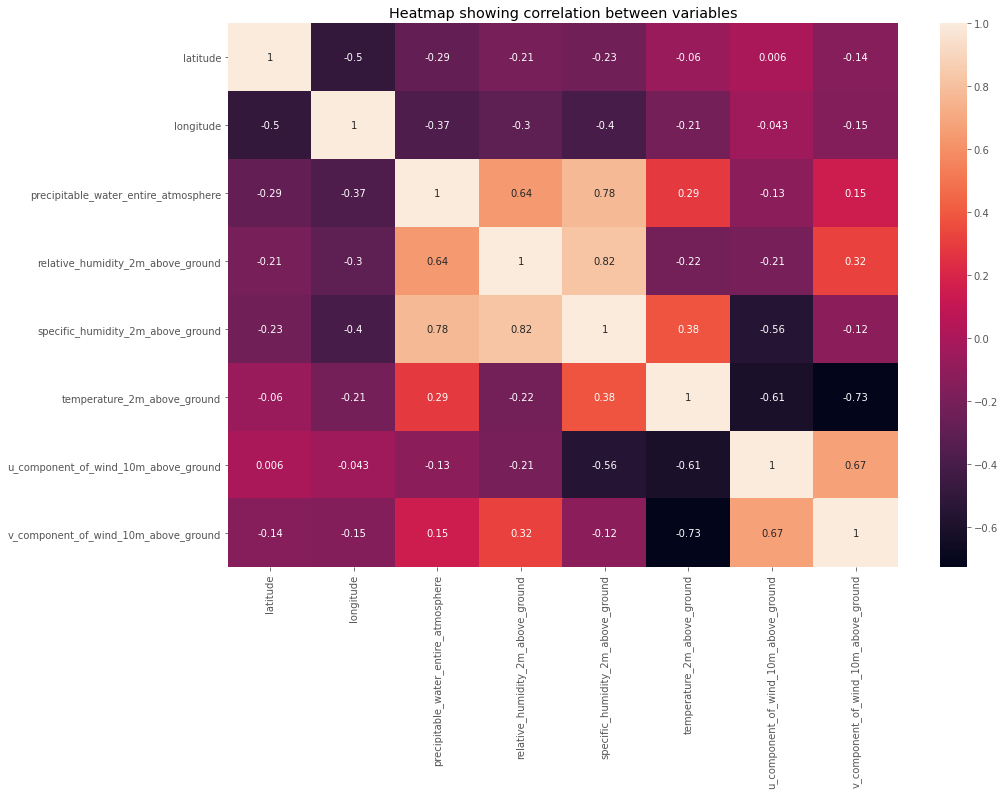

In [ ]:
# Create a visual display of the correlation matrix obtained above
plt.figure(figsize = (15, 10))
sns.heatmap(corrMatrix, annot=True)
plt.title('Heatmap showing correlation between variables')
plt.show()

## Conclusion 

This isn't a conclusion per se, but rather a way forward. 

* With the given information, a prediction model can be created to help predict road accidents given the season of the year i.e. rainy or sunny, time of day i.e. off peak and peak hours as well as locations. Thus being able to deploy ambulances at the predicted crash points. This in turn will shorten the time it will take to attend to post crash emergencies 